<a href="https://colab.research.google.com/github/Viroslav/CV/blob/main/algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from queue import PriorityQueue


def normalize_image(img: np.ndarray, threshold: float = 0.1):
    """
    normalize the image to be between 0 and 1
    """
    dims = img.shape
    env = np.ones(dims)
    z = np.where(img < threshold)
    env[z] = 0.0
    return env


def plot_enviroment(img: np.ndarray, obj: np.ndarray, state: tuple):
    """
    @param img: original image in 2d
    @param obj: is the 3d array of different configurations
    @param state: is the curent pose (x, y, orientation) of the object

    @return: the merged image
    """
    dims = obj.shape
    dim_x = int((dims[0] - 1) / 2)
    dim_y = int((dims[1] - 1) / 2)
    merged_img = np.copy(img)
    merged_img[state[0] - dim_x:state[0] + dim_x + 1, state[1] - dim_y:state[1] + dim_y + 1] += obj[:, :, state[2]] * 0.5
    return merged_img


def plotting_results(environment: np.ndarray, rod: np.ndarray, plan: list, save_path: str = 'rod_solve.mp4'):
    """
    create an animation of the plan and save it to a file

    @param environment: the environment image in 2d
    @param rod: is the 3d array of different configuration
    @param plan: list of poses
    @param save_path: path to save the animation
    """

    fig = plt.figure()
    imgs = []

    for s in plan:
        im = plot_enviroment(environment, rod, s)
        plot = plt.imshow(im)
        imgs.append([plot])

    ani = animation.ArtistAnimation(fig, imgs, interval=50, blit=True)

    ani.save(save_path)

    plt.show()


In [2]:
from numpy import load

data = load('./data_ps1.npz')

In [3]:
data['environment'].shape, data['rod'].shape

((100, 100), (11, 11, 4))

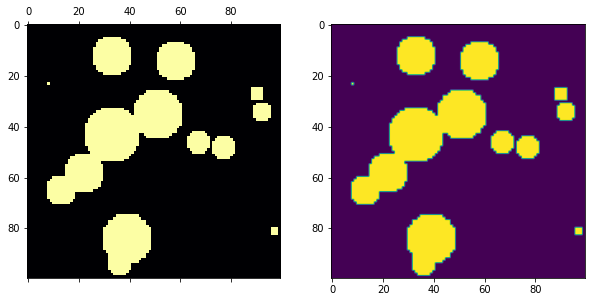

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
ax[0].matshow(data['environment'], cmap='inferno') #['viridis', 'plasma', 'inferno', 'magma', 'cividis']
ax[1].imshow(data['environment'])

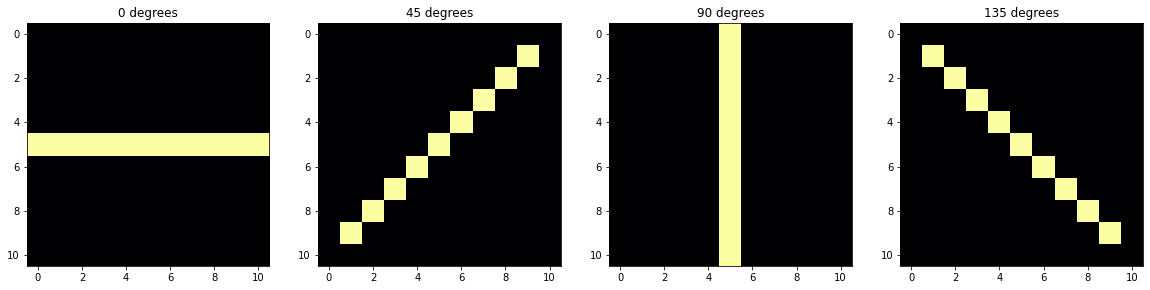

In [5]:
fig, ax = plt.subplots(1, 4, figsize=(20, 8) )
ax[0].imshow(data['rod'][:, :, 0], cmap='inferno')
ax[0].set_title('0 degrees')

ax[1].imshow(data['rod'][:, :, 1], cmap='inferno')
ax[1].set_title('45 degrees')

ax[2].imshow(data['rod'][:, :, 2], cmap='inferno')
ax[2].set_title('90 degrees')

ax[3].imshow(data['rod'][:, :, 3], cmap='inferno')
ax[3].set_title('135 degrees');

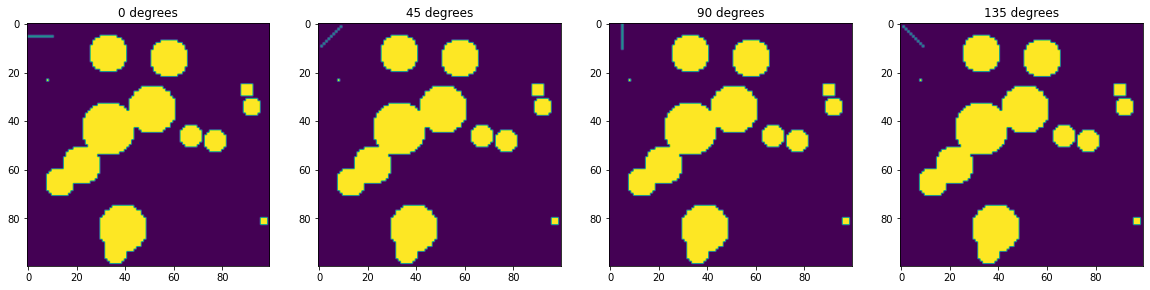

In [6]:
fig, ax = plt.subplots(1, 4, figsize=(20, 8))
ax[0].imshow(plot_enviroment(data['environment'], data['rod'], (5, 5, 0)))
ax[0].set_title('0 degrees')

ax[1].imshow(plot_enviroment(data['environment'], data['rod'], (5, 5, 1)))
ax[1].set_title('45 degrees')

ax[2].imshow(plot_enviroment(data['environment'], data['rod'], (5, 5, 2)))
ax[2].set_title('90 degrees')

ax[3].imshow(plot_enviroment(data['environment'], data['rod'], (5, 5, 3)))
ax[3].set_title('135 degrees');

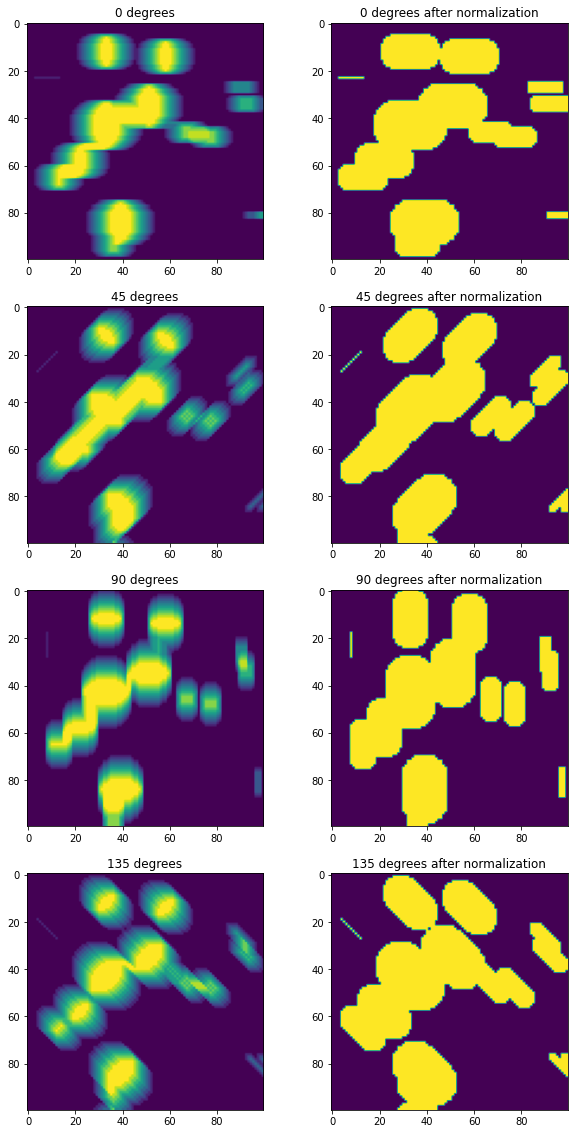

In [7]:
fig, ax = plt.subplots(4, 2, figsize=(10, 20))
w = ['0', '45', '90', '135']
for i in range(4):
    res = signal.convolve2d(data['environment'], data['rod'][:, :, i], boundary='symm', mode='same')
    ax[i, 0].imshow(res);
    ax[i, 1].imshow(normalize_image(res));
    ax[i, 0].set_title(f'{w[i]} degrees')
    ax[i, 1].set_title(f'{w[i]} degrees after normalization')

In [8]:
a = normalize_image(signal.convolve2d(data['environment'], data['rod'][:, :, 0], boundary='symm', mode='same'))
b = normalize_image(signal.convolve2d(data['environment'], data['rod'][:, :, 1], boundary='symm', mode='same'))
c = normalize_image(signal.convolve2d(data['environment'], data['rod'][:, :, 2], boundary='symm', mode='same'))
d = normalize_image(signal.convolve2d(data['environment'], data['rod'][:, :, 3], boundary='symm', mode='same'))

In [9]:
total = np.array([a, b, c, d])

In [10]:
total.shape

(4, 100, 100)

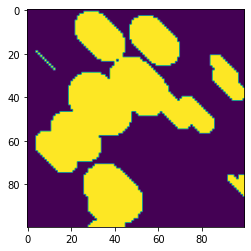

In [14]:
plt.imshow(total[3])

In [15]:
def step_r(pos):
    pos[1] += 1
    return pos

def step_l(pos):
    pos[1] -= 1
    return pos

def step_d(pos):
    pos[0] += 1
    return pos

def step_u(pos):
    pos[0] -= 1
    return pos

def rot_l(pos):
    if pos[2] == 3:
      pos[2] = 0
    else:
      pos[2] += 1
    return pos

def rot_r(pos):
    if pos[2] == 0:
      pos[2] = 3
    else:
      pos[2] -= 1
    return pos

In [ ]:
def rotate_possible(pos, grid):
    d = step_d(pos)[0]
    step_u(pos)
    u = step_u(pos)[0]
    step_d(pos)
    l = step_l(pos)[1]
    step_r(pos)
    r = step_r(pos)[1]
    step_l(pos)

In [452]:
update_neighbors_0([20,20,3])

[[20, 21, 0], [20, 19, 0], [21, 20, 0]]

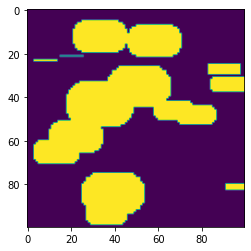

In [16]:
plt.imshow(plot_enviroment(a, data['rod'], ([21, 20, 0])))

In [683]:
def update_neighbors_0(pos, grid = a, neighbors = []):
    while pos[2] != 0:
      rot_r(pos)
    d = step_d(pos)[0]
    step_u(pos)
    u = step_u(pos)[0]
    step_d(pos)
    l = step_l(pos)[1]
    step_r(pos)
    r = step_r(pos)[1]
    step_l(pos)
    neighbors = []
    if pos[1] == 5:
      l_tip = pos[1] - 5
      r_tip = pos[1] + 5
      if (grid[pos[0], r_tip + 1] != 1):  #right
        neighbors.append([pos[0], r, pos[2]])
      if pos[0] < 99 and pos[0] >= 5 and (d <= 99) and (grid[d, r_tip] != 1) and (grid[d, l_tip] != 1):  #DOWN
        neighbors.append([d, pos[1], pos[2]])
      if pos[0] <= 99 and pos[0] > 5 and (u >= 5) and (grid[u, r_tip] != 1) and (grid[u, l_tip] != 1):  #up
        neighbors.append([u, pos[1], pos[2]])
            
    elif pos[1] == 95:
      l_tip = pos[1] - 5
      r_tip = pos[1] + 5
      if pos[0] < 99 and pos[0] >= 5 and (d <= 99) and (grid[d, r_tip] != 1) and (grid[d, l_tip] != 1):  #DOWN
          neighbors.append([d, pos[1], pos[2]])
      if pos[0] <= 99 and pos[0] > 5 and (u >= 5) and (grid[u, r_tip] != 1) and (grid[u, l_tip] != 1):  #up
          neighbors.append([u, pos[1], pos[2]])
      if (grid[pos[0], l_tip - 1] != 1):  #left
          neighbors.append([pos[0], l, pos[2]])

    elif pos[1] > 5 and pos[1] < 95:
      l_tip = pos[1] - 5
      r_tip = pos[1] + 5
      if r_tip <= 98 and l_tip >= 0 and (grid[pos[0], r_tip + 1] != 1):  #right
          neighbors.append([pos[0], r, pos[2]])
      if r_tip <= 98 and l_tip >= 0  and (grid[pos[0], l_tip - 1] != 1):  #left
          neighbors.append([pos[0], l, pos[2]])
      if pos[0] < 99 and pos[0] >= 5 and (d <= 99) and (grid[d, r_tip] != 1) and (grid[d, l_tip] != 1):  #DOWN
          neighbors.append([d, pos[1], pos[2]])
      if pos[0] <= 99 and pos[0] > 5 and (u >= 5) and (grid[u, r_tip] != 1) and (grid[u, l_tip] != 1):  #up
          neighbors.append([u, pos[1], pos[2]])

    return neighbors

In [678]:
def update_neighbors_45(pos, grid = b, neighbors_45 = []):
    while pos[2] != 1:
      rot_l(pos)
    
    d = step_d(pos)[0]
    step_u(pos)
    u = step_u(pos)[0]
    step_d(pos)
    l = step_l(pos)[1]
    step_r(pos)
    r = step_r(pos)[1]
    step_l(pos)
    neighbors_45 = []
    if pos[1] == 5:
      l_tip = pos[1] + 4
      r_tip = pos[1] - 4
      if r_tip <= 99 and l_tip >= 0 and (grid[pos[0] + 4, r_tip] != 1) and (grid[pos[0] - 4, l_tip] != 1):  #right
          neighbors_45.append([pos[0], r, pos[2]])
      if pos[0] < 99 and pos[0] >= 5 and (d <= 99) and (grid[d-4, l_tip] != 1) and (grid[d+4, r_tip] != 1):  #DOWN
          neighbors_45.append([d, pos[1], pos[2]])
      if pos[0] <= 99 and pos[0] > 5 and (u >= 5) and (grid[u+4, r_tip] != 1) and (grid[u-4, l_tip] != 1):  #up
          neighbors_45.append([u, pos[1], pos[2]])
            
    elif pos[1] == 95:
      l_tip = pos[1] + 4
      r_tip = pos[1] - 4
      if pos[0] < 99 and pos[0] >= 5 and (d <= 99) and (grid[d-4, l_tip] != 1) and (grid[d+4, r_tip] != 1):  #DOWN
          neighbors_45.append([d, pos[1], pos[2]])
      if pos[0] <= 99 and pos[0] > 5 and (u >= 5) and (grid[u+4, r_tip] != 1) and (grid[u-4, l_tip] != 1):  #up
          neighbors_45.append([u, pos[1], pos[2]])
      if r_tip <= 98 and l_tip >= 0 and (grid[pos[0] + 4, r_tip] != 1) and (grid[pos[0] - 4, l_tip] != 1):  #left
          neighbors_45.append([pos[0], l, pos[2]])

    elif pos[1] > 5 and pos[1] < 95:
      l_tip = pos[1] + 4
      r_tip = pos[1] - 4
      if r_tip <= 98 and l_tip >= 0 and (grid[pos[0] - 4, r_tip] != 1) and (grid[pos[0] + 4, l_tip] != 1):  #right
          neighbors_45.append([pos[0], r, pos[2]])
      if r_tip <= 98 and l_tip >= 0 and (grid[pos[0] + 4, r_tip] != 1) and (grid[pos[0] - 4, l_tip] != 1):  #left
          neighbors_45.append([pos[0], l, pos[2]])
      if pos[0] < 99 and pos[0] >= 5 and (d <= 99) and (grid[d-4, l_tip] != 1) and (grid[d+4, r_tip] != 1):  #DOWN
          neighbors_45.append([d, pos[1], pos[2]])
      if pos[0] <= 99 and pos[0] > 5 and (u >= 5) and (grid[u+4, r_tip] != 1) and (grid[u-4, l_tip] != 1):  #up
          neighbors_45.append([u, pos[1], pos[2]])

    return neighbors_45

In [600]:
update_neighbors_45([5,5,1])

[[5, 6, 1], [6, 5, 1]]

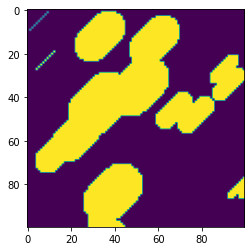

In [603]:
plt.imshow(plot_enviroment(b, data['rod'], (5, 5, 1)))

In [647]:
def update_neighbors_90(pos, grid = c, neighbors_90 = []):
    while pos[2] != 2:
        rot_l(pos)

    d = step_d(pos)[0]
    step_u(pos)
    u = step_u(pos)[0]
    step_d(pos)
    l = step_l(pos)[1]
    step_r(pos)
    r = step_r(pos)[1]
    step_l(pos)
    neighbors_90 = []
    if pos[0] == 5:
      l_tip = pos[0]
      r_tip = pos[0]
      if (grid[pos[0], r_tip + 1] != 1):  #right
        neighbors_90.append([pos[0], r, pos[2]])
      if pos[0] < 99 and pos[0] >= 5 and (d <= 99) and (grid[d, r_tip] != 1) and (grid[d, l_tip] != 1):  #DOWN
        neighbors_90.append([d, pos[1], pos[2]])
      if pos[0] <= 99 and pos[0] > 5 and (u >= 5) and (grid[u, r_tip] != 1) and (grid[u, l_tip] != 1):  #up
        neighbors_90.append([u, pos[1], pos[2]])
            
    elif pos[0] == 95:
      l_tip = pos[0]
      r_tip = pos[0]
      if pos[0] < 99 and pos[0] >= 5 and (d <= 99) and (grid[d, r_tip] != 1) and (grid[d, l_tip] != 1):  #DOWN
          neighbors_90.append([d, pos[1], pos[2]])
      if pos[0] <= 99 and pos[0] > 5 and (u >= 5) and (grid[u, r_tip] != 1) and (grid[u, l_tip] != 1):  #up
          neighbors_90.append([u, pos[1], pos[2]])
      if (grid[pos[0], l_tip - 1] != 1):  #left
          neighbors_90.append([pos[0], l, pos[2]])

    elif pos[0] > 5 and pos[0] < 95:
      l_tip = pos[0] + 5
      r_tip = pos[0] - 5
      if r_tip <= 98 and l_tip >= 0 and (grid[r, r_tip] != 1) and (grid[r, l_tip] != 1):  #right
          neighbors_90.append([pos[0], r, pos[2]])
      if r_tip <= 98 and l_tip >= 0 and (grid[l, r_tip] != 1) and (grid[l, l_tip] != 1):  #left
          neighbors_90.append([pos[0], l, pos[2]])
      if pos[0] < 99 and pos[0] >= 5 and (d <= 99) and (grid[d, l_tip+1] != 1) and (grid[d, r_tip+1] != 1):  #DOWN
          neighbors_90.append([d, pos[1], pos[2]])
      if pos[0] <= 99 and pos[0] > 5 and (u >= 5) and (grid[u, r_tip-1] != 1) and (grid[u, l_tip-1] != 1):  #up
          neighbors_90.append([u, pos[1], pos[2]])

    return neighbors_90

In [648]:
update_neighbors_90([55, 55, 2])

[[55, 56, 2], [55, 54, 2], [56, 55, 2], [54, 55, 2]]

In [646]:
b[55, 55]

0.0

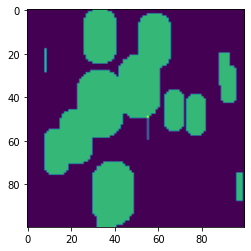

In [644]:
plt.imshow(plot_enviroment(c, data['rod'], (54, 55, 2)))

In [442]:
def update_neighbors_135(pos, grid = d, neighbors_135 = []):
    while pos[2] != 3:
        rot_l(pos)

    d = step_d(pos)[0]
    step_u(pos)
    u = step_u(pos)[0]
    step_d(pos)
    l = step_l(pos)[1]
    step_r(pos)
    r = step_r(pos)[1]
    step_l(pos)
    neighbors_135 = []
    if pos[1] == 5:
      l_tip = pos[1] - 5
      r_tip = pos[1] + 5
      if (grid[pos[0], r_tip + 1] != 1):  #right
        neighbors_135.append([pos[0], r, pos[2]])
      if pos[0] < 99 and pos[0] >= 5 and (d <= 99) and (grid[d, r_tip] != 1) and (grid[d, l_tip] != 1):  #DOWN
        neighbors_135.append([d, pos[1], pos[2]])
      if pos[0] <= 99 and pos[0] > 5 and (u >= 5) and (grid[u, r_tip] != 1) and (grid[u, l_tip] != 1):  #up
        neighbors_135.append([u, pos[1], pos[2]])
            
    elif pos[1] == 95:
      l_tip = pos[1] - 5
      r_tip = pos[1] + 5
      if pos[0] < 99 and pos[0] >= 5 and (d <= 99) and (grid[d, r_tip] != 1) and (grid[d, l_tip] != 1):  #DOWN
          neighbors_135.append([d, pos[1], pos[2]])
      if pos[0] <= 99 and pos[0] > 5 and (u >= 5) and (grid[u, r_tip] != 1) and (grid[u, l_tip] != 1):  #up
          neighbors_135.append([u, pos[1], pos[2]])
      if (grid[pos[0], l_tip - 1] != 1):  #left
          neighbors_135.append([pos[0], l, pos[2]])

    elif pos[1] > 5 and pos[1] < 95:
      l_tip = pos[1] - 5
      r_tip = pos[1] + 5
      if r_tip <= 98 and l_tip >= 0 and (grid[pos[0], r_tip + 1] != 1):  #right
          neighbors_135.append([pos[0], r, pos[2]])
      if r_tip <= 98 and l_tip >= 0  and (grid[pos[0], l_tip - 1] != 1):  #left
          neighbors_135.append([pos[0], l, pos[2]])
      if pos[0] < 99 and pos[0] >= 5 and (d <= 99) and (grid[d, r_tip] != 1) and (grid[d, l_tip] != 1):  #DOWN
          neighbors_135.append([d, pos[1], pos[2]])
      if pos[0] <= 99 and pos[0] > 5 and (u >= 5) and (grid[u, r_tip] != 1) and (grid[u, l_tip] != 1):  #up
          neighbors_135.append([u, pos[1], pos[2]])

    return neighbors_135

In [461]:
update_neighbors_135([19, 41, 2])

[[19, 42, 3]]

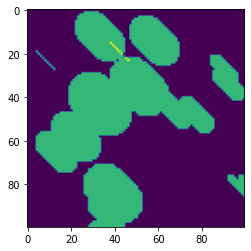

In [466]:
plt.imshow(plot_enviroment(d, data['rod'], (19, 42, 3)))

In [230]:
update_neighbors_0([6,5,0])

[[6, 6, 0], [7, 5, 0], [5, 5, 0]]

In [684]:
def algorithm(start, end, grid = a):
    neighbors = []
    neighbors = update_neighbors_0(list(start))
    neighbors += update_neighbors_45(list(start))
    print(neighbors)
    cost = 0   
    open_set = PriorityQueue()
    open_set.put((cost, start))   # (0, [6, 6, 0])
    g_score = {}
    g_score[start] = 0
    visited_set = {start}
    parent_table = {}
    
    while not open_set.empty():
        current = open_set.get()[1]
        neighbors = update_neighbors_0(list(current))
        #neighbors += update_neighbors_45(list(current))
        print(neighbors)
        
        if current == end:   # Success
            #print(parent_table.keys())
            #return True
            return parent_table
        
        for neighbor in neighbors:
            neighbor = tuple(neighbor)
            
            if neighbor not in visited_set:
                visited_set.add(neighbor)
                parent_table[neighbor] = current
                current_cost = cost + 1
                open_set.put((current_cost, neighbor))
                
            else:
                if cost + 1 < current_cost:
                    current_cost = cost + 1
                    parent_table[neighbor] = current
    return False

In [ ]:
algorithm((6,6,0), (55, 55, 0))

In [ ]:
par, e, f, q = algorithm((6,6,0), (55, 55, 0))

In [ ]:
way = []
parent = (55, 55, 0)
try:
  while True:
    prev_step = par[parent]
    way.append(parent)
    way.append(prev_step)
    parent = par[parent]
    
except:
  print('stop')
way

In [688]:
len(way)

372

In [689]:
way[216]

(22, 66, 0)

In [690]:
plan1 = way[::-1]

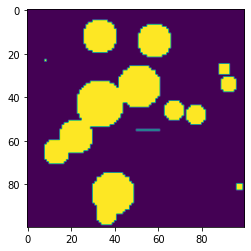

CPU times: user 15.6 s, sys: 203 ms, total: 15.8 s
Wall time: 16.2 s


In [691]:
%%time
plotting_results(data['environment'], rod = data['rod'], plan=plan1, save_path = 'rod_solve.mp4')